In [1]:
import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
from numpy import asarray
from numpy import savetxt
import pickle
import csv

In [2]:
#Obrim els seguents archius:

#Data EO amb 12 brain reagions y els powerband
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels_Banpower/list_final_save.txt", "rb") as fp: 
    dataEO = pickle.load(fp)

#Data EC amb 12 brain reagions y els powerband
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels_Banpower/list_finalEC_save.txt", "rb") as fp: 
    dataEC = pickle.load(fp)

#Llista dels noms dels pacients EC 
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels/sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    listEC_Names = pickle.load(fp)

#Llista dels noms dels pacients EO 
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels/sorted_list_EO_save.txt", "rb") as fp:   # Unpickling
    listEO_Names = pickle.load(fp)

In [3]:
lis_noms = ['Anterior_midline', 'Left_frontal', 'Right_frontal', 'Left_temporal', 'Left_central', 'Left_parietal', 'Left_Occipital', 'Right_Occipital', 'Right_parietal', 'Right_temporal', 'Posterior_midline', 'Right_central']

labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gama Lower']

from scipy import stats
import numpy as np

In [4]:
dabeNames_BR_Bads_BP =[]
for e in range(0, len(dataEO)):  #Per cada brain reagon
    dp = []
    for i in range(0, len(dataEO[e])): #Per cada Band
        new =[]
        for r in listEO_Names:
            new.append(str(r))
        dp.append(new)
    dabeNames_BR_Bads_BP.append(dp)


In [5]:
#Z-Score
#with ou the outliers
Clean_Data = [] #On guardarem totes les dades [pacients][bands][data]
New_listnames = [] #On guararem els noms dels pacients que han passat
Possitions = [] #On guardare les pcisions
for e in range(0, len(dataEO)):  #Per cada brain reagon
    Clean_Data_BR = []
    New_listnames_BR = []
    Possitions_BR= []
    for i in range(0, len(dataEO[e])-1): #Per cada Band
        Clean_Data_Band = []
        New_listnames_Band = []
        Possitions_Band = []
        df=pd.DataFrame(dataEO[e][i])  #Pas to Data frame
        df['z_score']=stats.zscore(df) #Get z-score
        for r in df['z_score']:        #Per cada linea en z-score
            if -1.5 < r > 1.5 :  #Si el z-score es major que 2.5
                rows = list(df['z_score'][df['z_score'] == float(r)].index) #Select la posicio que tingui el z-score alt
                text = str(rows) #El guardem en string
                Nombredada = df[0][int(text[1:-1])]  #busquem en la pocicio quina dada te
                Posicio = dataEO[e][i].index(Nombredada) #busquem en dataEO quina posicio te la dada
                Clean_Data_Band.append(dataEO[e][i][Posicio])
                Possitions_Band.append(Posicio)
                Nompacient = listEO_Names[Posicio] #busquem en aquella posicio el nom del pacient
                New_listnames_Band.append(Nompacient)
        Clean_Data_BR.append(Clean_Data_Band)
        New_listnames_BR.append(New_listnames_Band)
        Possitions_BR.append(Possitions_Band)
    Clean_Data.append(Clean_Data_BR)
    New_listnames.append(New_listnames_BR)
    Possitions.append(Possitions_BR)

In [6]:

Names_New = dabeNames_BR_Bads_BP.copy()
Dadas_New = dataEO.copy()
for e in range(0, len(dataEO)):  #Per cada brain reagon
    for i in range(0, len(dataEO[e])): #Per cada Band
        df=pd.DataFrame(dataEO[e][i])  #Pas to Data frame
        df['z_score']=stats.zscore(df) #Get z-score
        for r in df['z_score']:        #Per cada linea en z-score
            if -1.5 < r > 1.5 :  #Si el z-score es major que 2.5
                rows = list(df['z_score'][df['z_score'] == float(r)].index) #Select la posicio que tingui el z-score alt
                text = str(rows) #El guardem en string
                Nombredada = df[0][int(text[1:-1])]  #busquem en la pocicio quina dada te
                Posicio = dataEO[e][i].index(Nombredada) #busquem en dataEO quina posicio te la dada
                del Dadas_New[e][i][Posicio]
                del Names_New[e][i][Posicio]

In [7]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Project_G/EEG_G2/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']

In [8]:

#BandPower Minus from 4 in TEST
def minus_return_bandpower(testNames, patientNames, TEST, pacientData):
    minusVal = [] #Save the statistic.median of the y_corr
    for e in  range(0, len(pacientData)): #For each frequency band:
        y_corr = []       #Create variables where will go the pacientData value
        for i in range(0, len(pacientData[e])): #For each patient:
            hename = patientNames[e][i]  #Select the name of the patient
            hename = str(hename[:-7]) #Select only the number witout the extension
            if hename in testNames:   #If this is in the testNames:
                indices = [i for i, s in enumerate(testNames) if hename in s] #Get the position of the testNames
                x = (float(TEST[int(indices[0])])) #Get the value of the patient in the test selected
                if x<4.0: #If the patient test value is less than 4.
                    y = (float(pacientData[e][i])) #Get the value of the patientdata bandPower
                    y_corr.append(y)  #Add it in to the yCorr

        #PLOT ALL POINTS
        if len(y_corr)>2:
            resultat = statistics.median(y_corr) #Median (middle value) of data in that frequency band.
        else:
            resultat= 0
        minusVal.append(resultat) #Add the median
        
    return minusVal

#BandPower More from 4 in TEST
def max_return_bandpower(testNames, patientNames, TEST, pacientData):
    maxVal = [] #Save the statistic.median of the y_corr
    for e in  range(0, len(pacientData)): #For each frequency band:
        y_corr = []       #Create variables where will go the pacientData value
        for i in range(0, len(pacientData[e])): #For each patient:
            hename = patientNames[e][i]  #Select the name of the patient
            hename = str(hename[:-7]) #Select only the number witout the extension
            if hename in testNames:   #If this is in the testNames:
                indices = [i for i, s in enumerate(testNames) if hename in s] #Get the position of the testNames
                x = (float(TEST[int(indices[0])])) #Get the value of the patient in the test selected
                if x>4.0: #If the patient test value is more than 4.
                    y = (float(pacientData[e][i])) #Get the value of the patientdata bandPower
                    y_corr.append(y)  #Add it in to the yCorr

        if len(y_corr)>2:
            resultat = statistics.median(y_corr)
        else:
            resultat = 0
        maxVal.append(resultat) #Add the median
        
    return maxVal

#standar error of the mean 
def max_return_str(testNames, patientNames, TEST, pacientData):
    stt = [] #Save the scipy.stats.sem of the y_corr
    for e in  range(0, len(pacientData)): #For each frequency band:
        y_corr = []       #Create variables where will go the pacientData value
        for i in range(0, len(pacientData[e])): #For each patient:
            hename = patientNames[e][i]  #Select the name of the patient
            hename = str(hename[:-7]) #Select only the number witout the extension
            if hename in testNames:   #If this is in the testNames:
                indices = [i for i, s in enumerate(testNames) if hename in s] #Get the position of the testNames
                x = (float(TEST[int(indices[0])])) #Get the value of the patient in the test selected
                if x>4.0: #If the patient test value is more than 4.
                    y = (float(pacientData[e][i])) #Get the value of the patientdata bandPower
                    y_corr.append(y)  #Add it in to the yCorr
        if len(y_corr)>2:
            resultat = scipy.stats.sem(y_corr) #The standard error of the mean in the sample(s).
        else:
            resultat = 0
        stt.append(resultat) #Add the standard error of the mean
    return stt

#standar error of the mean 
def min_return_str1(testNames, patientNames, TEST, pacientData):
    stt = [] #Save the scipy.stats.sem of the y_corr
    for e in  range(0, len(pacientData)): #For each frequency band:
        y_corr = []       #Create variables where will go the pacientData value
        for i in range(0, len(pacientData[e])): #For each patient:
            hename = patientNames[e][i]  #Select the name of the patient
            hename = str(hename[:-7]) #Select only the number witout the extension
            if hename in testNames:   #If this is in the testNames:
                indices = [i for i, s in enumerate(testNames) if hename in s] #Get the position of the testNames
                x = (float(TEST[int(indices[0])])) #Get the value of the patient in the test selected
                if x<4.0: #If the patient test value is more than 4.
                    y = (float(pacientData[e][i])) #Get the value of the patientdata bandPower
                    y_corr.append(y)  #Add it in to the yCorr

        if len(y_corr)>2:
            resultat = scipy.stats.sem(y_corr) #The standard error of the mean in the sample(s).
        else:
            resultat = 0
        stt.append(resultat) #Save
    return stt

def plotbar_info_bandpower1 (names, sorted_list_EO, TeiQueSF_emotionality, list_bands):
    #chanels1_delta_EO, chanels1_theta_EO, chanels1_alpha_EO, chanels1_beta_EO, chanels1_gama_l_EO, chanels1_gama_u_EO
    labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gama Lower']
    minus5 = minus_return_bandpower(names, sorted_list_EO, TeiQueSF_emotionality, list_bands) #the median of the minus 4
    max5 = max_return_bandpower(names, sorted_list_EO, TeiQueSF_emotionality, list_bands) #the median of the max 4
    str1 = max_return_str(names, sorted_list_EO, TeiQueSF_emotionality, list_bands) #standar error of the mean 
    str2 = min_return_str1(names, sorted_list_EO, TeiQueSF_emotionality, list_bands)#standar error of the mean 

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars


    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, minus5, width, yerr=str2,capsize=0.05,label='-4')
    rects2 = ax.bar(x + width/2, max5, width, yerr=str1,capsize=0.05, label='+4')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Band Power')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

    return max5

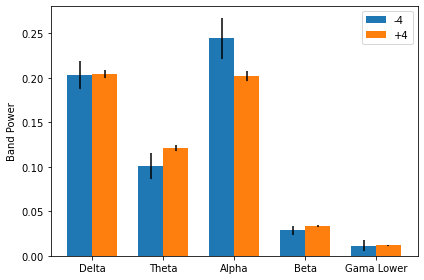

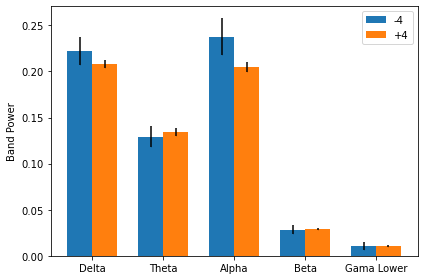

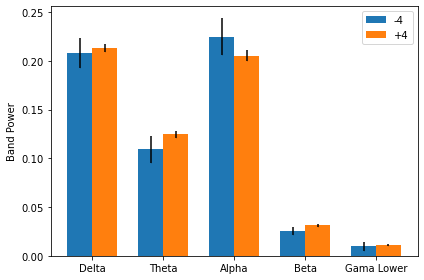

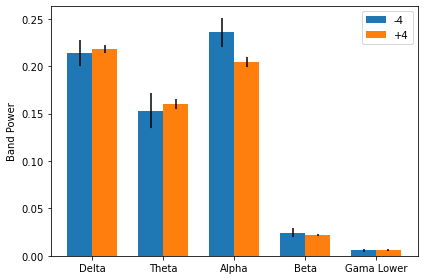

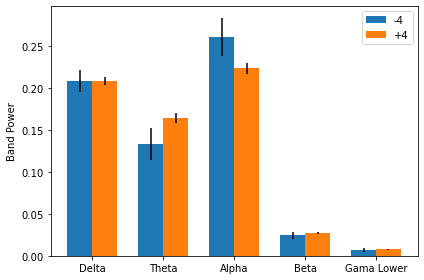

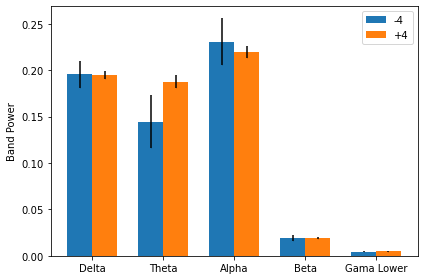

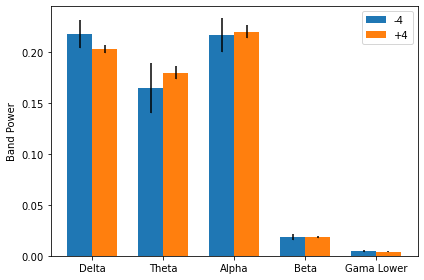

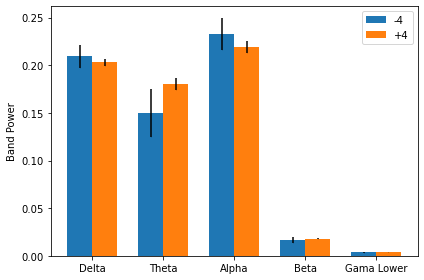

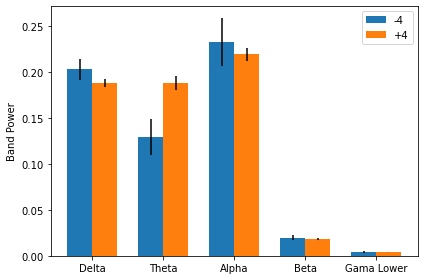

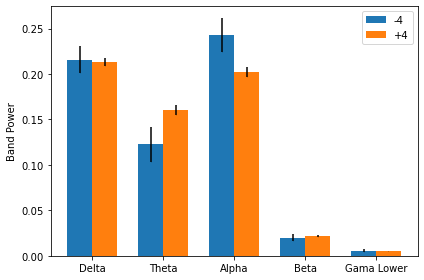

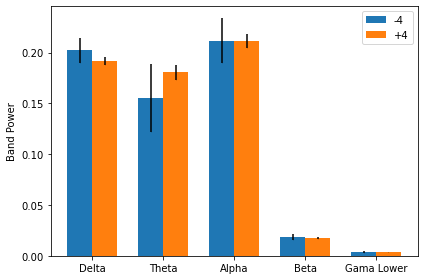

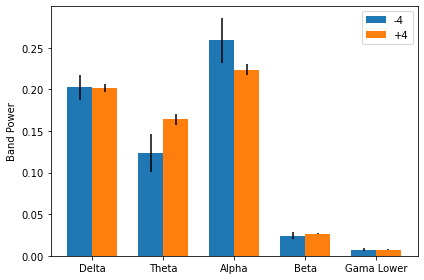

Well


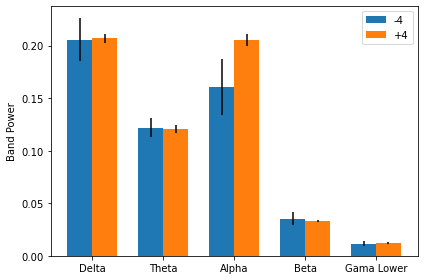

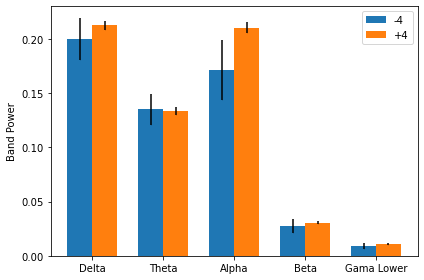

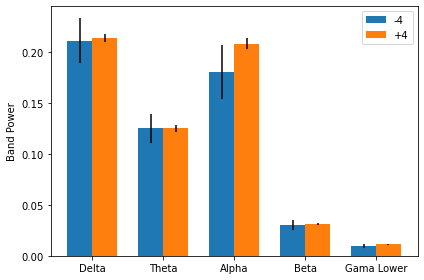

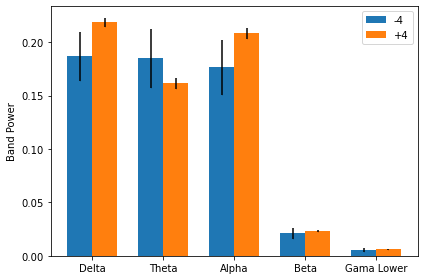

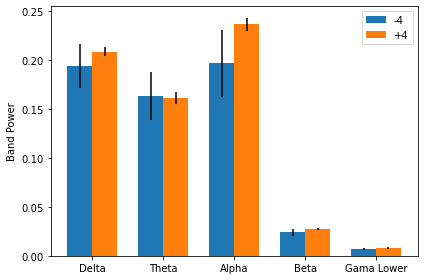

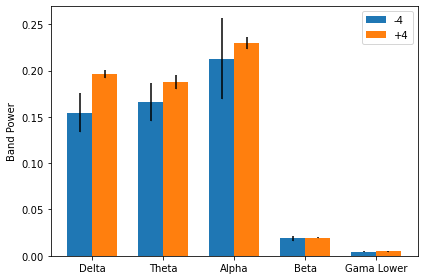

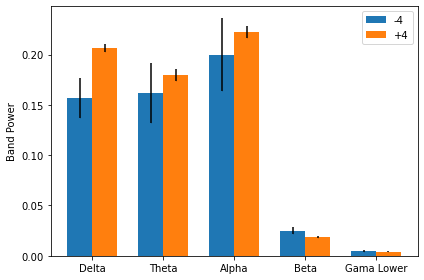

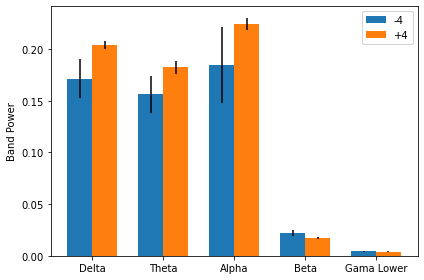

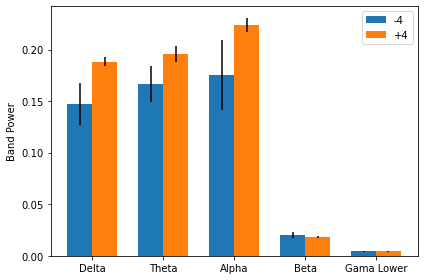

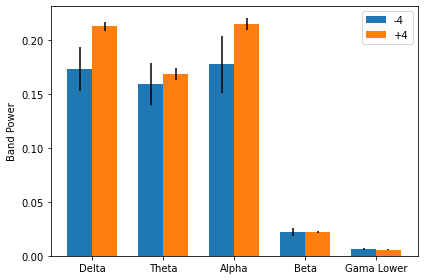

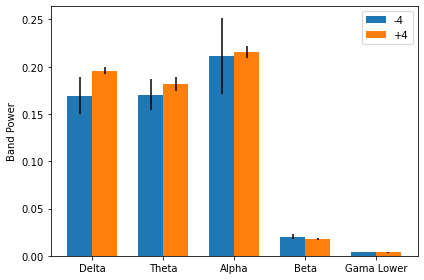

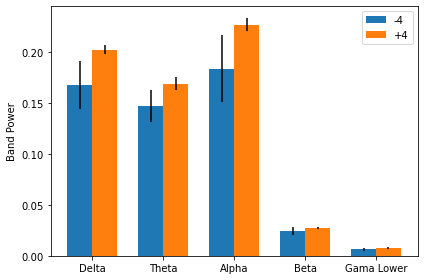

In [9]:
pi_x_patient=[]
bandPower_emotio_EO = []
bandPower_well_EO = []

for r in range(0,12):
    band_emotio = plotbar_info_bandpower1(names, Names_New[r], TeiQueSF_emotionality, Dadas_New[r])
    bandPower_emotio_EO.append(band_emotio)

print('Well')

for r in range(0,12):
    band_well = plotbar_info_bandpower1(names, Names_New[r], TeiQueSF_wellBeing, Dadas_New[r])
    bandPower_well_EO.append(band_well)

In [10]:
#Make the correlation of all the data:
def calcul(testNames, patientNames, TEST, pacientData, yo, oy):
    #testNames: 
    #patientNames:
    #TEST:
    #pacientData: bandPower each one with the data
    #yo & oy: 
    savecor = [] #Save the correlation of the xCorr and yCorr
    for e in  range(0, len(pacientData)): #For each frequency band:
        xCorr = []   #Create variables where will go the TEST value
        yCorr = []   #Create variables where will go the pacientData value
        y_corr = []       #Create variables where will go the pacientData value
        for i in range(0, len(pacientData[e])): #For each patient:
            hename = patientNames[e][i]  #Select the name of the patient
            hename = str(hename[:-7])  #Select only the number witout the extension 
            if hename in testNames:    #If this is in the testNames:
                indices = [i for i, s in enumerate(testNames) if hename in s] #Get the position of the testNames
                x = (float(TEST[int(indices[0])])) #Get the value of the patient in the test selected
                xCorr.append(x) #Add it in to the xCorr
                y = (float(pacientData[e][i]))     #Get the value of the patientdata bandPower
                yCorr.append(y) #Add it in to the yCorr
                plt.scatter(x,y, c='g') #Add it a point in to the plot.
        #Create the line
        z = np.poly1d(np.polyfit(xCorr, yCorr, 1))
        y_len = np.array(len(yCorr))
        xp = np.linspace(yo, oy, y_len)
        y = z(xp)
        plt.plot(xp, y, c='b')

        #PLOT ALL POINTS
        plt.title('Plot show the correlation between test Selected and Band Power')
        plt.show()
        print(stats.pearsonr(xCorr, yCorr)) #Print the stats.pearsonr
        savecor.append(stats.pearsonr(xCorr, yCorr)) #0: Pearson’s correlation coefficient, 1: Two-tailed p-value
    return savecor

Anterior_midline


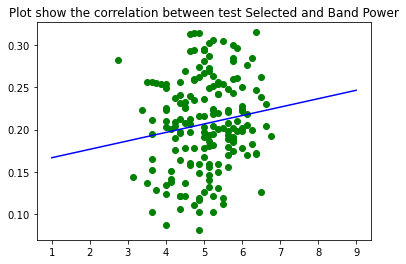

(0.14393096620978635, 0.057395186732564725)


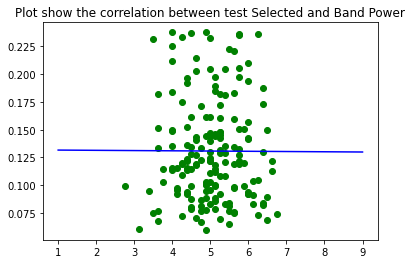

(-0.003693520450878819, 0.9616468976870896)


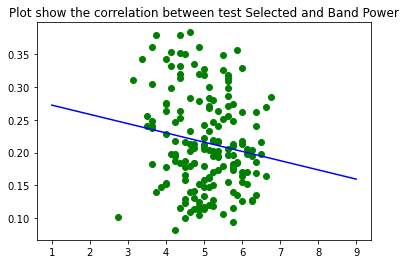

(-0.15691780681303558, 0.04040042236452179)


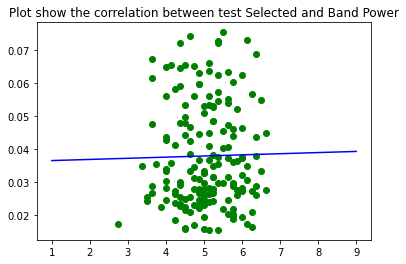

(0.016977695542646866, 0.8255598926670474)


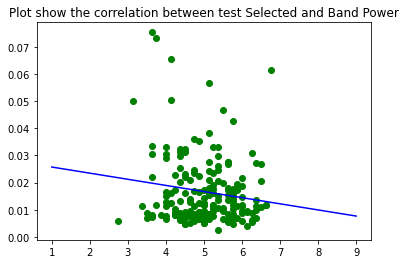

(-0.1406559455290453, 0.0575417588169654)
Left_frontal


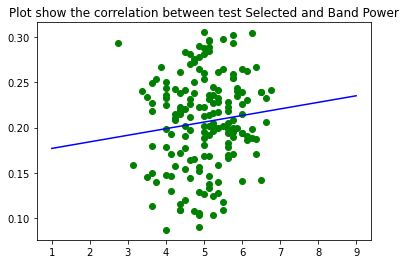

(0.11178828265813254, 0.1442957862859115)


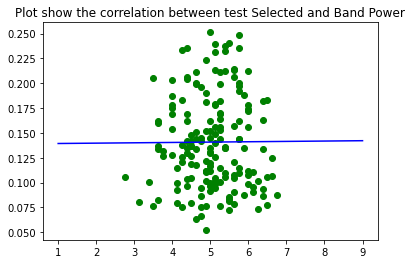

(0.0058518407769732935, 0.9396288250026714)


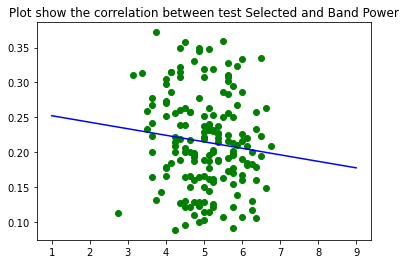

(-0.11191948595024971, 0.14382244948304573)


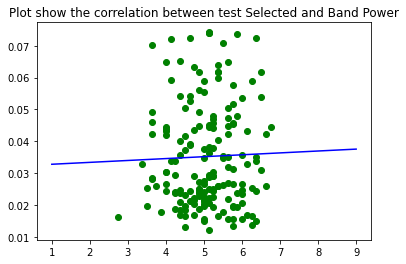

(0.028508970807302643, 0.7104582167326385)


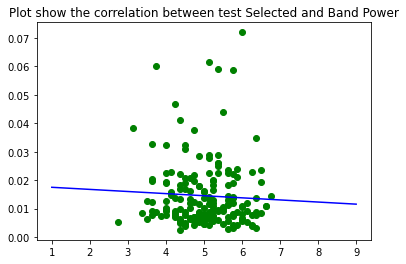

(-0.049728059069504005, 0.5049902455818821)
Right_frontal


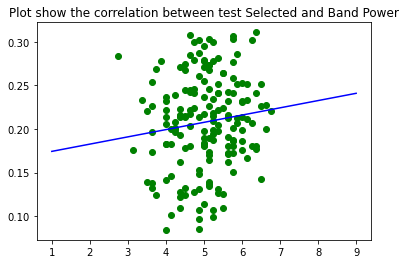

(0.1237978992294906, 0.10363031804507603)


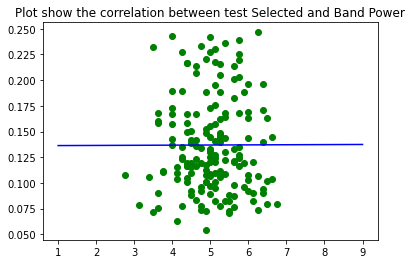

(0.0022914750201273038, 0.9764114862073324)


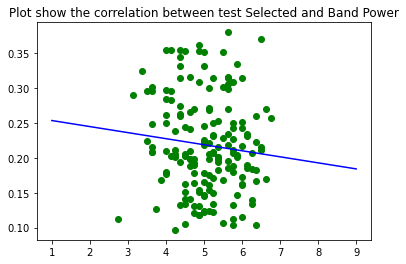

(-0.10302072072085898, 0.17996583151390705)


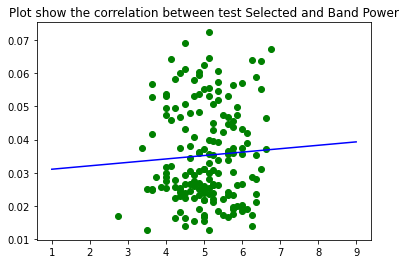

(0.05530214064294866, 0.4711902484077905)


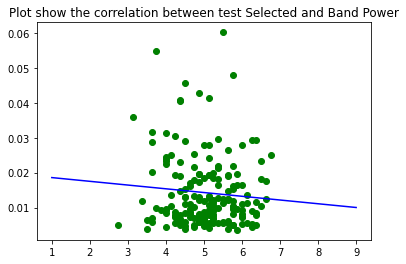

(-0.08261519876934163, 0.2688716990956398)
Left_temporal


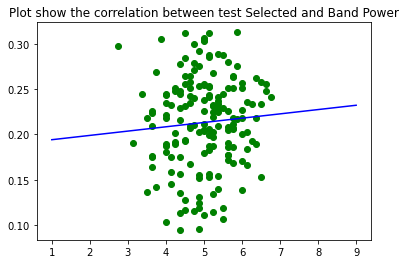

(0.07336314433254801, 0.3431698312849304)


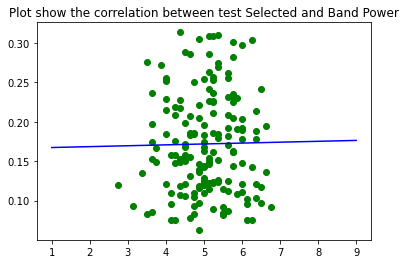

(0.014198269880205582, 0.8550602274100334)


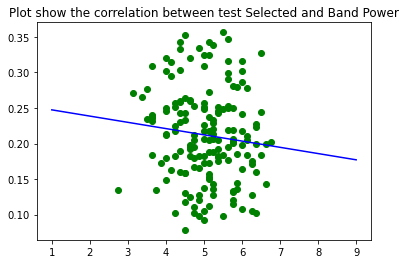

(-0.10930640379887697, 0.15841424090016037)


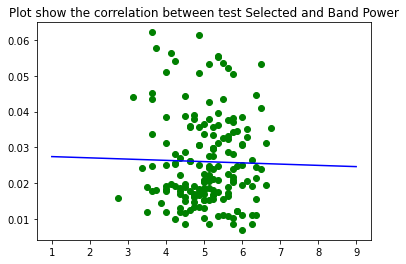

(-0.022173513245627212, 0.7727972562084212)


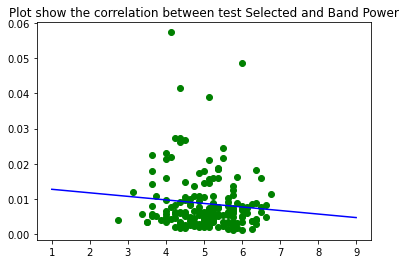

(-0.09708781700168145, 0.19105275242918382)
Left_central


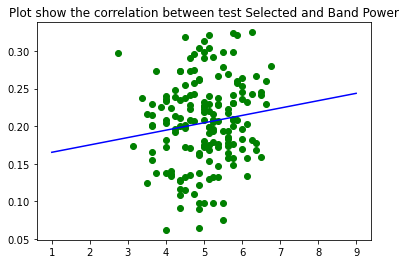

(0.1351092616167045, 0.07808416302657555)


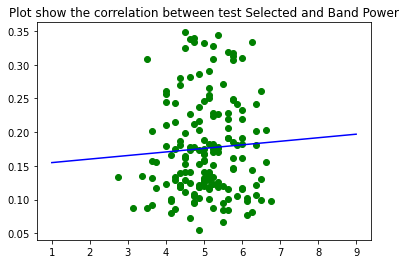

(0.05717582195849383, 0.46435698690042404)


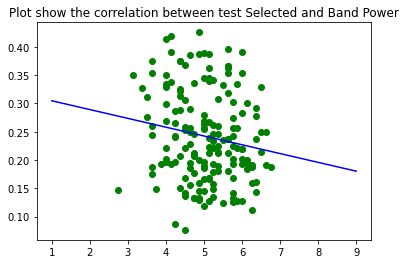

(-0.15727263408079667, 0.04053848761391037)


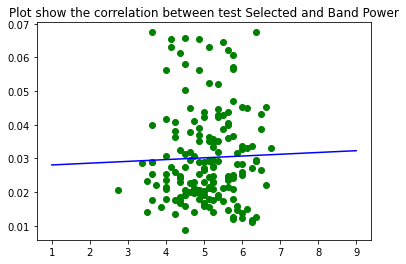

(0.02995998472648338, 0.6955805564560757)


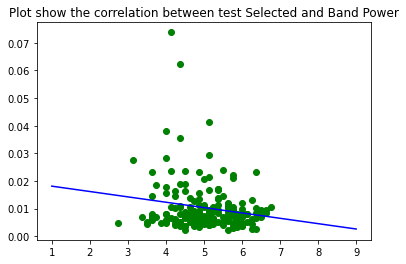

(-0.16996547005697454, 0.02143361369123506)
Left_parietal


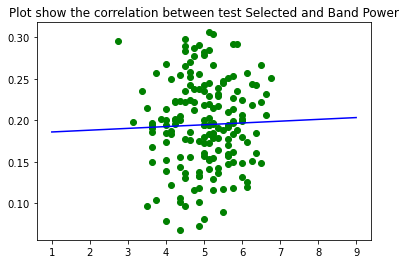

(0.0322003106111163, 0.6749731382388883)


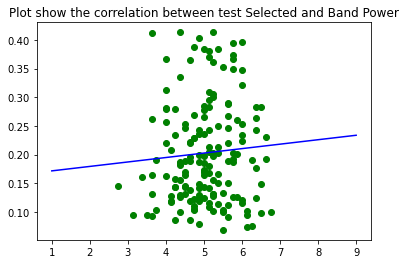

(0.06787643217382455, 0.3863477090255696)


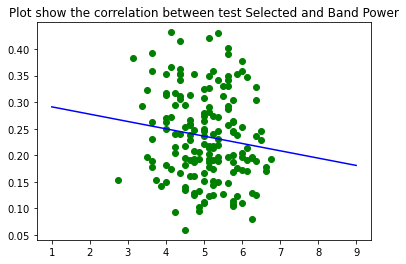

(-0.13408793194992746, 0.08500895523714481)


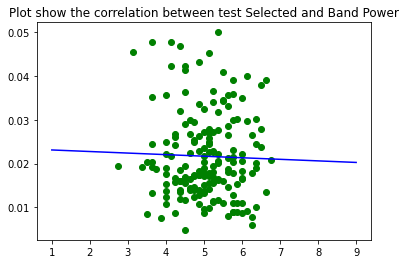

(-0.028822980484317577, 0.7057728767869994)


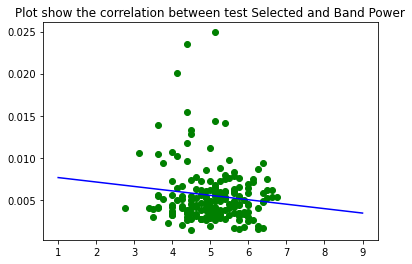

(-0.121018075996862, 0.10270311282331583)
Left_Occipital


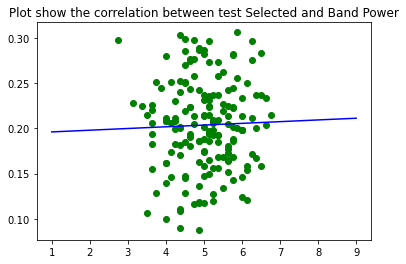

(0.030322110706270684, 0.6920866764799246)


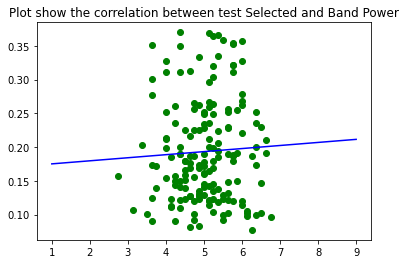

(0.0465593005463627, 0.5489748226290179)


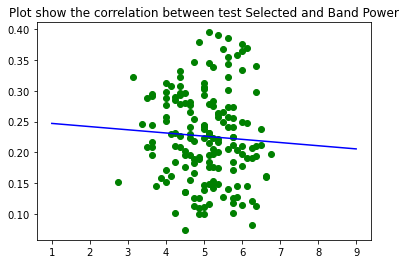

(-0.056339144194894, 0.4695764159477015)


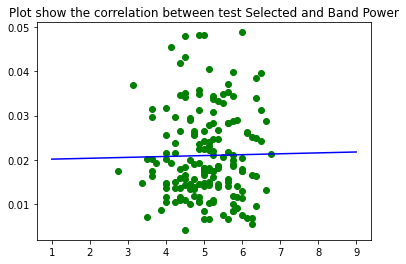

(0.01613589144511977, 0.8335968017687392)


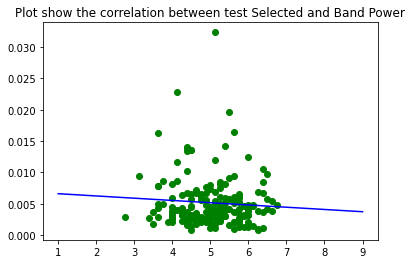

(-0.06964140485970997, 0.3488748042652321)
Right_Occipital


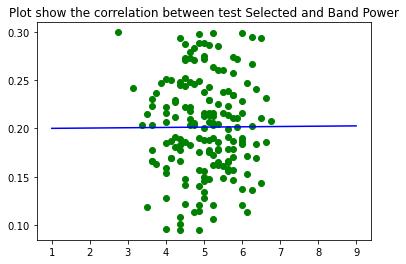

(0.005097301456704052, 0.9466229780767015)


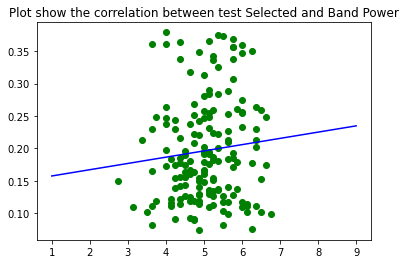

(0.09490805125547001, 0.22105451825619538)


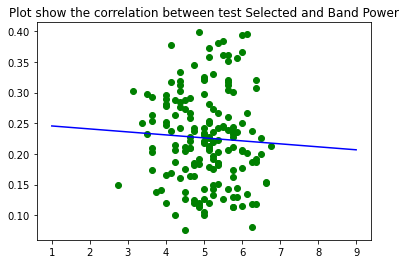

(-0.051752464537602114, 0.5052659552747962)


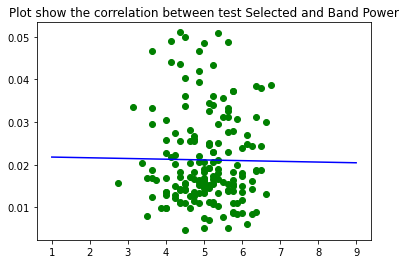

(-0.012350944121150644, 0.8715011377084715)


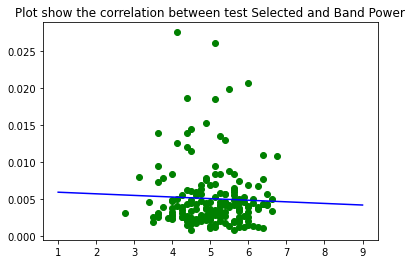

(-0.04020707262870803, 0.5889192596183384)
Right_parietal


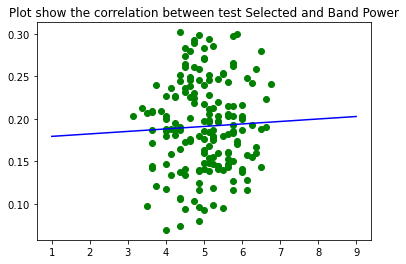

(0.04233024305365958, 0.5802777579445029)


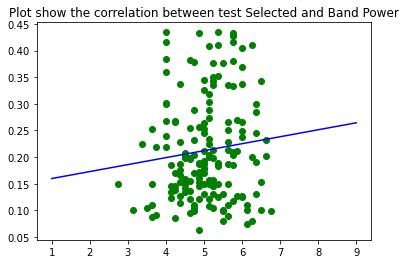

(0.10578914021716727, 0.17232237251481225)


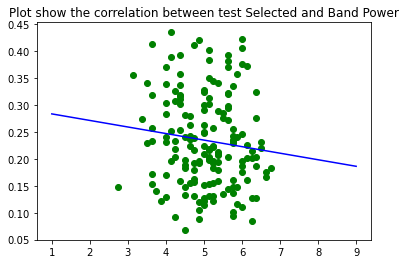

(-0.11488395101819474, 0.13930709498191682)


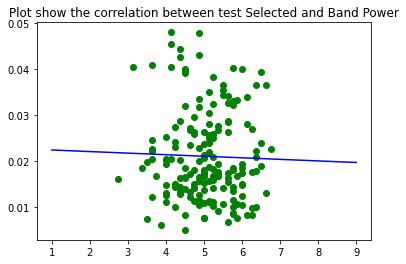

(-0.02737785007261554, 0.7183328615159117)


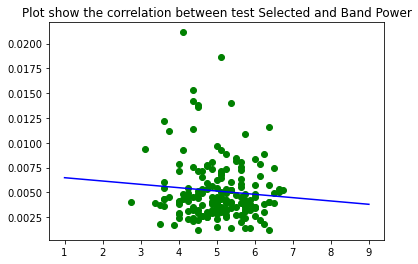

(-0.0861190339341395, 0.2463873755474498)
Right_temporal


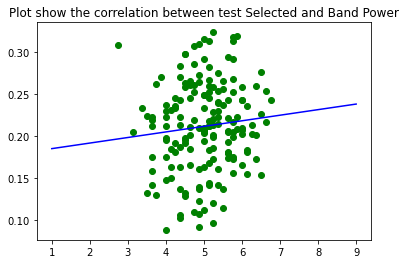

(0.09801611775222208, 0.20216791175811974)


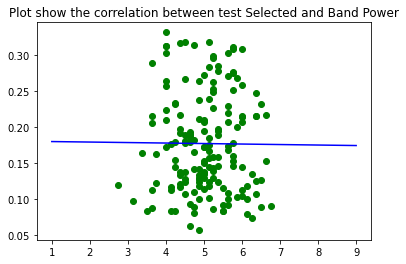

(-0.007891534052657141, 0.9198683773733973)


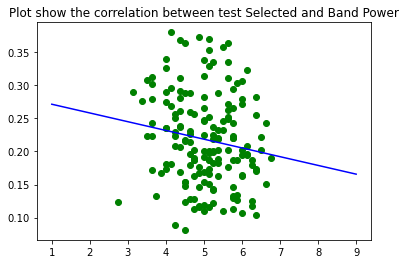

(-0.15481815274442118, 0.045092695656029455)


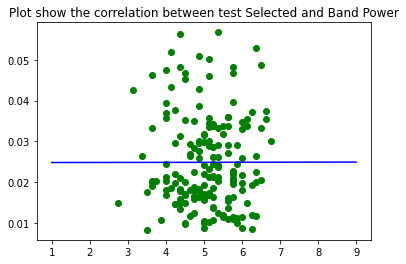

(0.0009488725121433415, 0.9901144681667614)


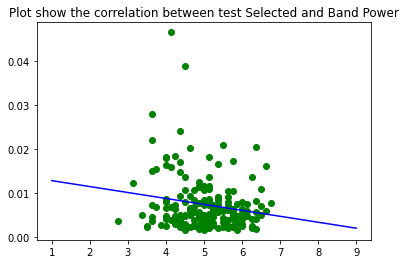

(-0.17319719181133875, 0.019044353953465116)
Posterior_midline


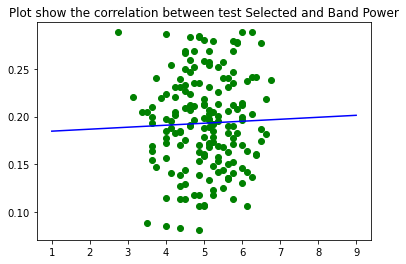

(0.033305489023394544, 0.6617095002873424)


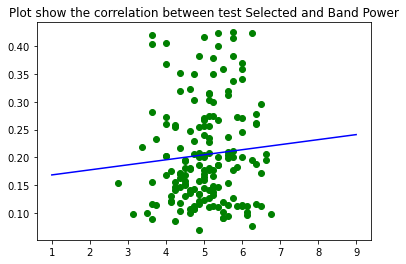

(0.07816116875768161, 0.3139048134225983)


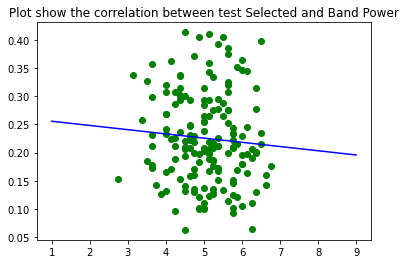

(-0.07480793328703277, 0.3351795297755335)


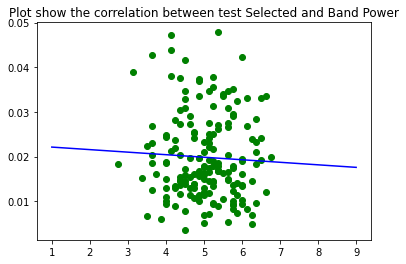

(-0.0476950075211984, 0.5308028950827944)


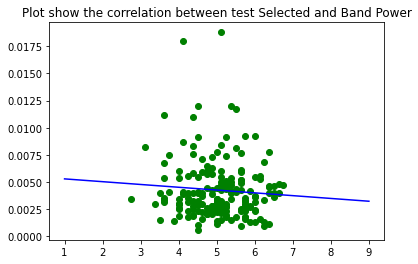

(-0.07436530948606924, 0.31707435549780383)
Right_central


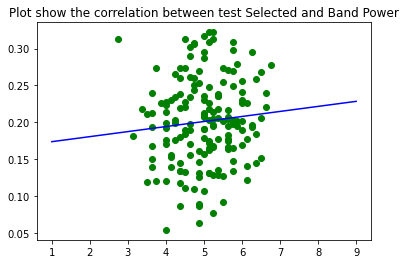

(0.0933866132636047, 0.22578890048307218)


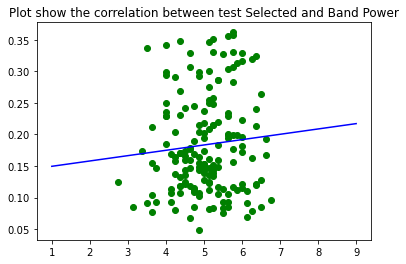

(0.08415716527947008, 0.2781064674952555)


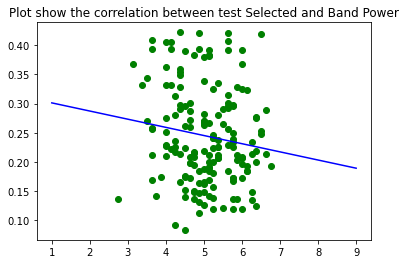

(-0.1366092899286449, 0.07655192694696503)


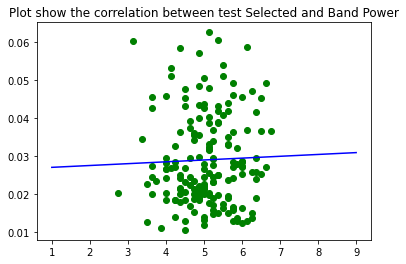

(0.03151524035855761, 0.6815076933884481)


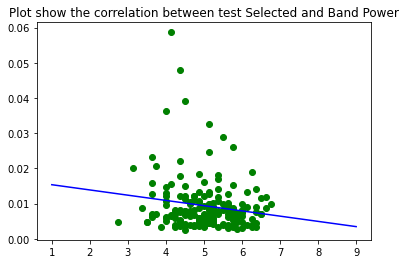

(-0.15697534333304056, 0.03382542140904824)


In [11]:
save_corr_emotio_EO = []
for r in range(0,12):
    print(str(lis_noms[r]))
    cor = calcul(names, Names_New[r], TeiQueSF_emotionality, Dadas_New[r], 1, 9)
    save_corr_emotio_EO.append(cor)

In [12]:
New_listnames
#191 xx
#195 x
#201 x
#220 x
#227 x
#254 xx
#276 x
from collections import defaultdict
d = defaultdict(int)
for i in New_listnames:
    for w in i:
        for r in w:
            for e in w:
                d[e] += 1
                
            

In [13]:
d

defaultdict(int,
            {'sub-010027_EO.set': 138,
             'sub-010069_EO.set': 150,
             'sub-010084_EO.set': 265,
             'sub-010165_EO.set': 150,
             'sub-010168_EO.set': 130,
             'sub-010197_EO.set': 150,
             'sub-010233_EO.set': 63,
             'sub-010298_EO.set': 150,
             'sub-010299_EO.set': 136,
             'sub-010306_EO.set': 150,
             'sub-010020_EO.set': 13,
             'sub-010060_EO.set': 188,
             'sub-010067_EO.set': 151,
             'sub-010126_EO.set': 205,
             'sub-010155_EO.set': 117,
             'sub-010157_EO.set': 103,
             'sub-010170_EO.set': 45,
             'sub-010262_EO.set': 205,
             'sub-010269_EO.set': 140,
             'sub-010289_EO.set': 81,
             'sub-010295_EO.set': 205,
             'sub-010305_EO.set': 154,
             'sub-010321_EO.set': 186,
             'sub-010045_EO.set': 206,
             'sub-010048_EO.set': 262,
            